## Case Airbnb | Análise Exploratória de Dados

O negócio do Airbnb baseia-se em um modelo de mercado online (plataforma) que conecta anfitriões (proprietários de imóveis) e hóspedes (viajantes) para locação de acomodações por temporada. O valor é gerado através da economia compartilhada, permitindo que pessoas comuns gerem renda extra alugando seus espaços.

## Problemática

A operação do Airbnb na América Latina apresenta diferenças relevantes entre os principais mercados da região (Brasil, México, Argentina e Colômbia) em termos de preços, comportamento de usuários e sustentabilidade da oferta de imóveis. Diante do objetivo estratégico de ampliar o número de diárias reservadas por turistas estrangeiros, torna-se necessário compreender como essas diferenças se manifestam ao longo da jornada de reserva e no ciclo de vida dos imóveis na plataforma.

##Análise Exploratória

Esta Análise Exploratória de Dados (EDA) tem como objetivo analisar e comparar os principais indicadores de preço, conversão e retenção de imóveis nos quatro mercados da América Latina, identificando padrões, assimetrias e possíveis gargalos ao longo do funil de reservas. A partir dessa análise, busca-se gerar insights orientados ao negócio que apoiem decisões estratégicas relacionadas à precificação, otimização da experiência do usuário e sustentabilidade da oferta de hospedagens.

In [1]:
#Importação de Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Listando abas do arquivo .xlsx

arquivo = 'Airbnb.xlsx'

xls = pd.ExcelFile(arquivo)
xls.sheet_names

print(xls.sheet_names)


['Imoveis', 'Fluxo de reserva de imóvel - Br', 'Retenção de imóveis']


In [3]:
dfs = pd.read_excel(arquivo, sheet_name=None)

df_imoveis = dfs['Imoveis']
df_fluxo = dfs['Fluxo de reserva de imóvel - Br']
df_retencao = dfs['Retenção de imóveis']

In [4]:
#Visualização de cada aba e entendimento das estruturas

df_imoveis.head()

,Nome do local,Localização,País,Tipo de acomodação,Classificação,Comodidades,Políticas de cancelamento,Preço,Número de reservas no ano,Número de Fotos
0,Hostel Montanha,San Andrés,Colômbia,Hostel,5 estrelas,"Wi-Fi, café da manhã",7 dias antes,30,11,5
1,Mirliban,Buenos Aires,Argentina,Apartamento,5 estrelas,"Wi-Fi, ar condicionado",72 horas,10,25,7
2,Estrela Dourada,Guadalajara,México,Hotel,5 estrelas,"Piscina, recepção",reembolsável,14,73,12
3,Mar Azul Beach,Fortaleza,Brasil,Hotel,5 estrelas,"Wi-Fi, armários",48 horas antes,35,162,2
4,Montanha Mágica,Curitiba,Brasil,Quarto,4 estrelas,"Piscina, churrasqueira",7 dias antes,48,200,2


In [5]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Nome do local              49 non-null     object
 1   Localização                49 non-null     object
 2   País                       49 non-null     object
 3   Tipo de acomodação         49 non-null     object
 4   Classificação              49 non-null     object
 5   Comodidades                49 non-null     object
 6   Políticas de cancelamento  49 non-null     object
 7   Preço                      49 non-null     int64 
 8   Número de reservas no ano  49 non-null     int64 
 9   Número de Fotos            49 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 4.0+ KB


**O que essa tabela representa no negócio**

Esta tabela representa o cadastro de imóveis disponíveis na plataforma Airbnb nos principais mercados da América Latina. Cada registro contém informações descritivas do imóvel, como localização, tipo de acomodação, classificação, políticas de cancelamento, preço da diária e métricas associadas à demanda anual (número de reservas).

**Granularidade dos dados**

A granularidade é por imóvel. Cada linha corresponde a um imóvel único listado na plataforma, independentemente do período de tempo.

**Análises que esta tabela viabiliza**
- Análise de preços das diárias por país e tipo de acomodação
- Comparação de métricas de demanda (número de reservas no ano) entre países
- Avaliação da distribuição de preços e identificação de assimetrias
- Segmentações por classificação, tipo de imóvel ou políticas de cancelamento

**Análises que esta tabela não viabiliza**
- Análises temporais (não há dimensão de data)
- Avaliação do comportamento do usuário ao longo do funil de reserva
- Análise de retenção ao longo do tempo
- Identificação de sazonalidade nas reservas

In [6]:
df_fluxo.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01 00:00:00,14583827.4,11521223.646,10023464.57202,7617833.074735,5256304.821567
1,2021-02-01 00:00:00,14574634.4,11513961.176,10017146.22312,7613031.129571,5252991.479404
2,2021-03-01 00:00:00,15303366.12,12089659.2348,10518003.534276,7993682.68605,5515641.053374
3,2021-04-01 00:00:00,16068534.426,12694142.19654,11043903.71099,8393366.820352,5791423.106043
4,2021-05-01 00:00:00,16871961.1473,13328849.306367,11596098.896539,8813035.16137,6080994.261345


In [7]:
df_fluxo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Mês                   102 non-null    object
 1   Home                  99 non-null     object
 2   Resultado de busca    99 non-null     object
 3   Detalhes do imóvel    99 non-null     object
 4   Check-out             99 non-null     object
 5   Conclusão da reserva  99 non-null     object
dtypes: object(6)
memory usage: 5.4+ KB


**O que essa tabela representa no negócio**

Esta tabela representa o funil de conversão de reservas do Airbnb ao longo do tempo, com dados agregados mensalmente. A estrutura da aba contém blocos distintos de dados para cada país analisado, permitindo a comparação do desempenho do funil entre os principais mercados da América Latina.

**Granularidade dos dados**

A granularidade é mensal e agregada por país. Cada linha representa um mês, e cada bloco da tabela corresponde a um país específico, mesmo que essa informação não esteja explicitamente registrada em uma coluna.

**Interpretação das etapas do funil**

As colunas representam as etapas da jornada do usuário na plataforma, desde o acesso inicial até a conclusão da reserva:
Home → Resultado de busca → Detalhes do imóvel → Check-out → Conclusão da reserva.


**Análises que esta tabela viabiliza**
- Construção do funil de conversão por país
- Comparação ds taxas de conversão entre os mercados
- Identificação de gargalos específicos entre os mercados
- Análise de evolução temporal da eficiência do funil

**Limitações dos dados**
- O país não está explicitado como coluna, exigindo tratamento adicional dos dados
- Não há identificação de usuários individuais
- Não é possível analisar causas específicas de abandono

In [8]:
df_retencao.head()

,Mês de cadastro do imóvel,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2022-01-01,1,0.90,0.70,0.60,0.58,0.56,0.54,0.52,0.50,0.48,0.46,0.43,0.4
1,2022-02-01,1,0.88,0.80,0.70,0.67,0.64,0.61,0.58,0.55,0.52,0.50,0.45,NaN
2,2022-03-01,1,0.90,0.82,0.73,0.70,0.67,0.64,0.61,0.58,0.55,0.50,NaN,NaN
3,2022-04-01,1,0.83,0.70,0.65,0.63,0.57,0.50,0.44,0.42,0.38,NaN,NaN,NaN
4,2022-05-01,1,0.93,0.85,0.80,0.76,0.72,0.68,0.64,0.60,NaN,NaN,NaN,NaN


In [9]:
df_retencao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Mês de cadastro do imóvel  12 non-null     datetime64[ns]
 1   0                          12 non-null     int64         
 2   1                          12 non-null     float64       
 3   2                          11 non-null     float64       
 4   3                          10 non-null     float64       
 5   4                          9 non-null      float64       
 6   5                          8 non-null      float64       
 7   6                          7 non-null      float64       
 8   7                          6 non-null      float64       
 9   8                          5 non-null      float64       
 10  9                          4 non-null      float64       
 11  10                         3 non-null      float64       
 12  11        

**O que essa tabela representa no negócio**

Esta tabela representa uma análise de cohort de retenção de imóveis na plataforma Airbnb. Cada linha corresponde a um cohort de imóveis agrupados pelo mês em que foram inicialmente cadastrados na plataforma, enquanto as colunas representam a evolução da retenção desses imóveis ao longo do tempo.


**Granularidade dos dados**

A granularidade é por cohort mensal de imóveis. Cada valor indica a proporção de imóveis de um determinado cohort que permanecem ativos na plataforma após n meses desde o cadastro inicial.

**Interpretação das métricas de retenção**

O valor igual a 1 na coluna inicial indica 100% dos imóveis ativos no momento do cadastro. As colunas subsequentes (0, 1, 2, …, 12) representam a taxa de retenção acumulada dos imóveis após cada mês desde a entrada na plataforma. Valores ausentes (NaN) indicam que o período de observação ainda não foi completado para cohorts mais recentes.


**Análises que esta tabela viabiliza**
- Comparação da retenção de imóveis entre cohorts antigos e recentes
- Identificação de quedas de retenção ao longo dos primeiros meses de vida do imóvel
- Avaliação da sustentabilidade da oferta de imóveis na plataforma
- Identificação de cohorts com desempenho crítico de retenção

**Limitações dos dados**
- Não há segmentação por país ou tipo de imóvel
- Não é possível identificar motivos específicos para a saída dos imóveis da plataforma
- A análise considera apenas a permanência do imóvel ativo, não o volume de reservas

## Análise de preços das diárias

Pergunta chave: Como os preços das diárias se comportam nos quatro países analisados?

In [10]:
df_imoveis.groupby('País')['Preço'].describe()

,count,mean,std,min,25%,50%,75%,max
País,,,,,,,,
Argentina,10.0,168.100000,78.297793,10.0,137.00,183.5,223.75,272.0
Brasil,15.0,163.200000,81.600245,35.0,101.50,170.0,218.50,300.0
Colômbia,14.0,145.928571,61.537311,30.0,114.75,160.0,193.50,249.0
México,10.0,152.700000,72.562693,14.0,139.00,156.5,183.25,289.0


In [11]:
precos_pais = (
    df_imoveis
    .groupby('País')['Preço']
    .agg(
        media='mean',
        mediana='median',
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    )
)
precos_pais['iqr'] = precos_pais['q3'] - precos_pais['q1']
precos_pais

,media,mediana,q1,q3,iqr
País,,,,,
Argentina,168.100000,183.5,137.00,223.75,86.75
Brasil,163.200000,170.0,101.50,218.50,117.00
Colômbia,145.928571,160.0,114.75,193.50,78.75
México,152.700000,156.5,139.00,183.25,44.25


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

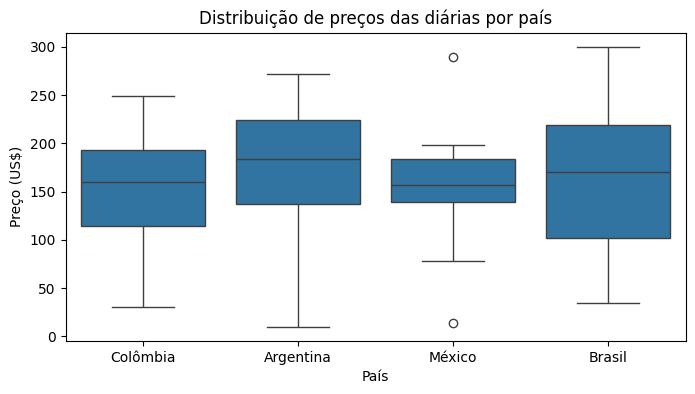

In [12]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    data=df_imoveis,
    x='País',
    y='Preço'
)

plt.title('Distribuição de preços das diárias por país')
plt.xlabel('País')
plt.ylabel('Preço (US$)')
plt

**Principais insights da análise de preços por país**

A análise conjunta das métricas descritivas e do boxplot indica que os padrões de distribuição de preços variam entre os países. A Argentina apresenta leve assimetria à esquerda, com valores mais baixos influenciando a média. O México possui preços concentrados em torno da mediana, porém com outliers relevantes que afetam a média. Já Brasil e Colômbia exibem maior equilíbrio visual, sendo o Brasil o mercado mais heterogêneo em termos de dispersão de preços. Esses resultados reforçam a importância de interpretar média e mediana em conjunto com análises visuais, especialmente diante de amostras reduzidas.

A heterogeneidade do mercado brasileiro sugere maior flexibilidade de posicionamento para atrair diferentes perfis de turistas estrangeiros, enquanto mercados como México e Colômbia indicam oportunidades mais focadas em otimização de volume e experiência, dado o perfil de preços mais concentrado.

## Distribuição de Preços no Brasil

Pergunta chave: Como os imóveis no Brasil se distribuem ao longo das faixas de preço?

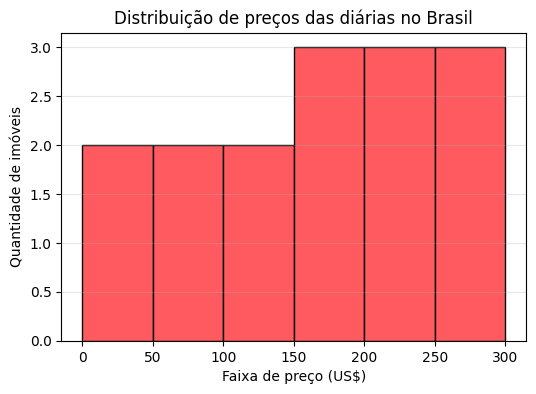

In [13]:
df_brasil = df_imoveis[df_imoveis['País'] == 'Brasil']

bins = range(0, int(df_brasil['Preço'].max()) + 50, 50)

# Gráfico de Histograma
plt.figure(figsize=(6, 4))

plt.hist(
    df_brasil['Preço'],
    bins=bins,
    edgecolor='black', color='#FF5A5F')

plt.title('Distribuição de preços das diárias no Brasil')
plt.xlabel('Faixa de preço (US$)')
plt.ylabel('Quantidade de imóveis')

plt.xticks(bins)
plt.grid(axis='y', alpha=0.3)

plt.show()

A distribuição de preços das diárias no Brasil mostra uma presença relativamente equilibrada de imóveis ao longo das faixas de preço analisadas, com imóveis distribuídos tanto nas faixas mais baixas quanto nas mais elevadas. Observa-se que uma parcela relevante da oferta está concentrada acima de US$ 150, indicando que o mercado brasileiro não se restringe a opções de baixo custo e apresenta diversidade de posicionamento de preços. Dado o tamanho reduzido da amostra, não é possível afirmar um padrão estatístico robusto de assimetria, mas o gráfico evidencia a coexistência de imóveis econômicos e de maior valor.

##Funil de Conversão

In [14]:
# Remover linhas vazias
df_fluxo = df_fluxo.dropna(how='all').copy()

#Criação coluna de País
df_fluxo['País'] = None

In [15]:
#Removendo linhas que são apenas títulos de país (células mescladas no excel)
df_fluxo = df_fluxo[~df_fluxo['Home'].isna()].copy()

df_fluxo = df_fluxo.reset_index(drop=True)

#Removendo cabeçalhos repetidos
df_fluxo = df_fluxo[df_fluxo['Mês'] != 'Mês'].copy()



In [16]:
#Atribuir países por intervalo
df_fluxo.loc[0:23, 'País'] = 'Brasil'
df_fluxo.loc[24:48, 'País'] = 'Colômbia'
df_fluxo.loc[49:73, 'País'] = 'México'
df_fluxo.loc[74:98, 'País'] = 'Argentina'


In [17]:
#Validando qtd de linhas por País
df_fluxo.groupby('País')['Mês'].count()


,Mês
País,
Argentina,24
Brasil,24
Colômbia,24
México,24


In [18]:
#Empilhando as etapas

df_funil = df_fluxo.melt(
    id_vars=['País', 'Mês'],
    value_vars=[
        'Home',
        'Resultado de busca',
        'Detalhes do imóvel',
        'Check-out',
        'Conclusão da reserva'
    ],
    var_name='Etapa',
    value_name='Volume'
)

In [19]:
# Agregação de país e etapa (soma)

funil_pais = (
    df_funil
    .groupby(['País', 'Etapa'])['Volume']
    .sum()
    .reset_index()
)

funil_pais.head()

,País,Etapa,Volume
0,Argentina,Check-out,112274827.861648
1,Argentina,Conclusão da reserva,50523672.537742
2,Argentina,Detalhes do imóvel,207916347.891941
3,Argentina,Home,426495072.598854
4,Argentina,Resultado de busca,319871304.449141


In [20]:
#Ordem das etapas

ordem_etapas = [
    'Home',
    'Resultado de busca',
    'Detalhes do imóvel',
    'Check-out',
    'Conclusão da reserva'
]

funil_pais['Etapa'] = pd.Categorical(
    funil_pais['Etapa'],
    categories=ordem_etapas,
    ordered=True
)

funil_pais = funil_pais.sort_values(['País', 'Etapa'])


In [21]:
# Calculo conversão por etapa

funil_pais['Conversao_etapa'] = (
    funil_pais
    .groupby('País')['Volume']
    .pct_change()
    .add(1)
)

funil_pais.head(20)

,País,Etapa,Volume,Conversao_etapa
3,Argentina,Home,426495072.598854,NaN
4,Argentina,Resultado de busca,319871304.449141,0.75
2,Argentina,Detalhes do imóvel,207916347.891941,0.65
0,Argentina,Check-out,112274827.861648,0.54
1,Argentina,Conclusão da reserva,50523672.537742,0.45
8,Brasil,Home,618417855.268339,NaN
9,Brasil,Resultado de busca,488550105.661987,0.79
7,Brasil,Detalhes do imóvel,425038591.925929,0.87
5,Brasil,Check-out,323029329.863706,0.76
6,Brasil,Conclusão da reserva,222890237.605957,0.69


Ao analisar a conversão geral da home até a conclusão da reserva no período analisado, observa-se que o Brasil apresenta a maior conversão total, indicando maior eficiência acumulada ao longo da jornada de reserva em comparação aos demais países.

Em relação às perdas ao longo do funil, identificam-se padrões distintos entre os países. Na Colômbia, a maior perda de usuários ocorre na etapa final (Check-out → Conclusão da reserva), sugerindo fricções no momento de fechamento. No México, a principal perda acontece nas etapas iniciais (Home → Resultado de busca), indicando menor eficiência na navegação inicial. A Argentina apresenta perdas distribuídas de forma relativamente constante ao longo de todas as etapas, enquanto o Brasil demonstra quedas mais suaves, com melhor retenção especialmente no meio do funil.

## Análise de Cohort

In [22]:
# Ajustando o índice para período mensal
df_retencao = df_retencao.set_index('Mês de cadastro do imóvel')
df_retencao.index = df_retencao.index.to_period('M')

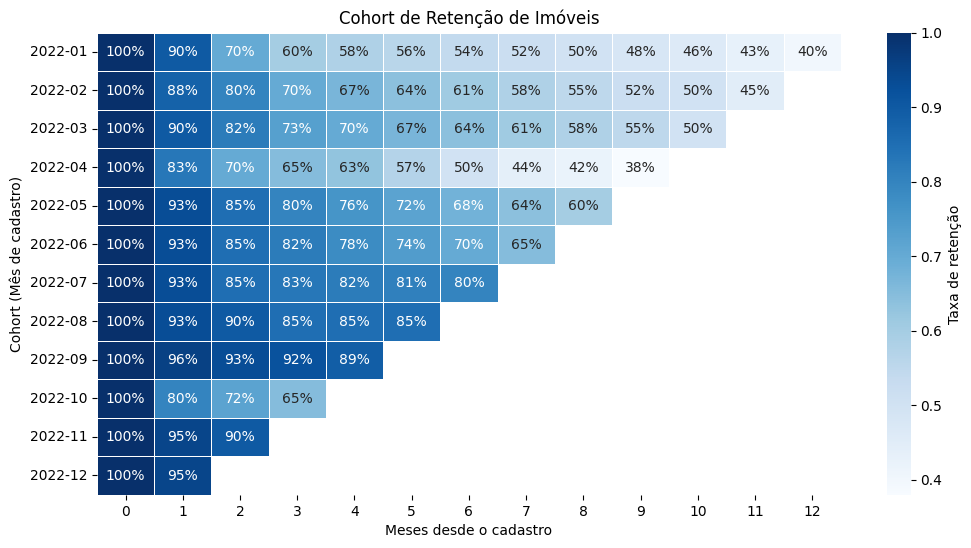

In [23]:
# Criando a visualização

plt.figure(figsize=(12, 6))

sns.heatmap(
    df_retencao,
    annot=True,
    fmt='.0%',
    cmap='Blues',
    linewidths=0.5,
    cbar_kws={'label': 'Taxa de retenção'}
)

plt.title('Cohort de Retenção de Imóveis')
plt.xlabel('Meses desde o cadastro')
plt.ylabel('Cohort (Mês de cadastro)')
plt.show()

**Comparação entre cohorts recentes e antigos (primeiros 6 meses)**

Ao analisar as taxas de retenção nos primeiros 6 meses, observa-se que os cohorts mais recentes (a partir de julho/2022) apresentam melhor desempenho de retenção quando comparados aos cohorts mais antigos (início de 2022).
Enquanto os cohorts iniciais mostram quedas mais acentuadas já nos primeiros meses, os cohorts mais recentes mantêm taxas de retenção mais elevadas ao longo do período analisado, indicando uma melhoria gradual na permanência dos imóveis na plataforma.


**Cohort com pior retenção após 6 meses**

O cohort que apresenta o pior nível de retenção após 6 meses é o de abril/2022, com taxa de retenção em torno de 50% no sexto mês.
Esse resultado indica um nível mais elevado de churn de imóveis cadastrados nesse período, sugerindo possíveis dificuldades relacionadas ao engajamento inicial dos anfitriões ou a condições específicas do mercado naquele momento.
Embora o cohort de janeiro/2022 também apresente retenção relativamente baixa após seis meses, o cohort de abril/2022 se destaca negativamente por registrar o menor percentual observado no período analisado.


A análise de cohort indica uma melhora consistente na retenção dos imóveis ao longo de 2022, com cohorts mais recentes apresentando maior permanência nos primeiros seis meses. Observa-se que o período inicial após o cadastro é crítico para a retenção, sugerindo que ações focadas em onboarding e suporte aos anfitriões podem gerar impacto direto na redução do churn de imóveis.

## Projeção de Reservas para 2023


In [24]:
# Primeiro, vou realizar uma análise temporal e entender o total de reservas concluídas em 2021 e 2022 para cada país.

df_fluxo['Mês'] = pd.to_datetime(df_fluxo['Mês'])
df_fluxo['Ano'] = df_fluxo['Mês'].dt.year


In [25]:
# Realizando a soma do fechamento anual de cada país da última etapa do funil
reservas_ano = (
    df_fluxo
    .groupby(['País', 'Ano'])['Conclusão da reserva']
    .sum()
    .reset_index()
)

reservas_ano.head()

,País,Ano,Conclusão da reserva
0,Argentina,2021,18107814.706515
1,Argentina,2022,32415857.831227
2,Brasil,2021,79884436.734975
3,Brasil,2022,143005800.870982
4,Colômbia,2021,22246425.403131


In [26]:
# % Crescimento Anual

reservas_pivot = reservas_ano.pivot(index='País', columns='Ano', values='Conclusão da reserva')


reservas_pivot['crescimento'] = (reservas_pivot[2022] - reservas_pivot[2021]) / reservas_pivot[2021]

reservas_pivot.head()


Ano,2021,2022,crescimento
País,,,
Argentina,18107814.706515,32415857.831227,0.790158
Brasil,79884436.734975,143005800.870982,0.790158
Colômbia,22246425.403131,39824626.81493,0.790158
México,46446113.711511,83145903.75964,0.790158


In [27]:
# Projeção

reservas_pivot['2023_proj'] = (
    reservas_pivot[2022] * (1 + reservas_pivot['crescimento'])
)

reservas_pivot.head()

Ano,2021,2022,crescimento,2023_proj
País,,,,
Argentina,18107814.706515,32415857.831227,0.790158,58029522.38937
Brasil,79884436.734975,143005800.870982,0.790158,256003045.381645
Colômbia,22246425.403131,39824626.81493,0.790158,71292392.921931
México,46446113.711511,83145903.75964,0.790158,148844343.682818


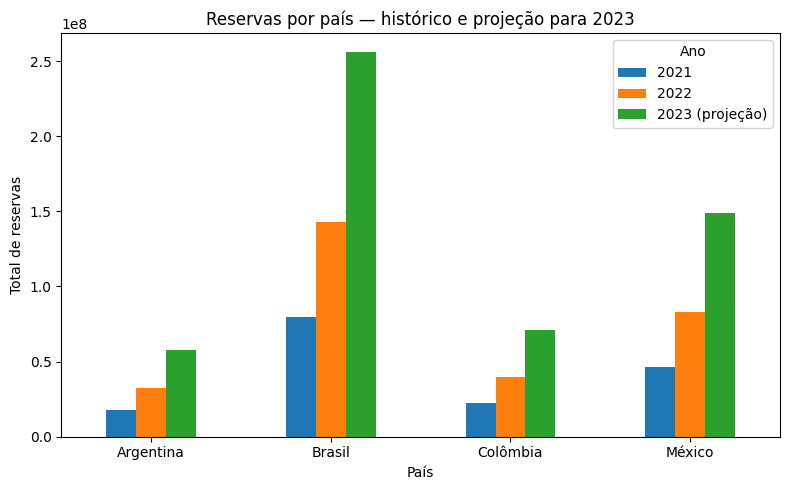

In [28]:
df_plot = reservas_pivot.reset_index()[['País', 2021, 2022, '2023_proj']]

df_plot = df_plot.rename(columns={
    2021: '2021',
    2022: '2022',
    '2023_proj': '2023 (projeção)'
})


df_plot.set_index('País').plot(
    kind='bar',
    figsize=(8, 5)
)

plt.title('Reservas por país — histórico e projeção para 2023')
plt.ylabel('Total de reservas')
plt.xlabel('País')
plt.xticks(rotation=0)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

**Projeção de Reservas para 2023 — Análise e Interpretação**

A projeção de reservas para 2023 foi construída a partir do crescimento observado entre 2021 e 2022, considerando o volume anual total de reservas concluídas por país. Trata-se, portanto, de uma projeção agregada anual, não contemplando variações mensais ou trimestrais, nem efeitos de sazonalidade.
Observa-se que, entre 2021 e 2022, todos os países analisados apresentaram um crescimento consistente de aproximadamente **79% no volume de reservas**, o que indica um padrão homogêneo de expansão da plataforma na região no período analisado. Esse mesmo percentual foi utilizado como premissa para a projeção de 2023.

Com base nesse cenário, o **Brasil** se destaca como o país com maior volume absoluto projetado de reservas para 2023, seguido por **México** e **Colômbia**. A **Argentina**, embora apresente crescimento, mantém a menor projeção absoluta entre os quatro países, refletindo uma base histórica menor de reservas.

É importante destacar que esta projeção assume a **continuidade das condições observadas em 2021 e 2022**, sem considerar fatores externos, mudanças estratégicas ou variações macroeconômicas que poderiam impactar a demanda. Dessa forma, os resultados devem ser interpretados como uma **estimativa direcional,** útil para comparações relativas entre países, e não como uma previsão precisa de volume futuro.

## Conclusão geral

A análise exploratória dos dados do Airbnb na América Latina evidencia **diferenças estruturais relevantes entre os países**, ao mesmo tempo em que aponta padrões consistentes ao longo da jornada de reserva e do ciclo de vida dos imóveis.

Do ponto de vista de **preços**, observa-se uma distribuição assimétrica, com concentração de imóveis em faixas mais acessíveis e presença de outliers que elevam o preço médio. As diferenças entre média e mediana indicam que o preço, isoladamente, não é suficiente para explicar o desempenho de reservas entre os países.

A análise do **funil de conversão** mostra que, embora os volumes iniciais variem entre os mercados, o principal gargalo ocorre de forma consistente nas etapas finais da jornada, especialmente entre **detalhes do imóvel, check-out e conclusão da reserva**. Esse padrão sugere oportunidades de otimização relacionadas à experiência do usuário, clareza de informações e fricções no processo de finalização.

Na **retenção de imóveis**, a análise de cohort revela melhora gradual nos cohorts mais recentes, com taxas iniciais de retenção mais elevadas. Ainda assim, identifica-se um **ponto crítico recorrente em torno do sexto mês**, quando a queda de retenção se acentua, indicando possível churn estrutural de anfitriões após esse período.

Por fim, a **projeção de reservas para 2023**, baseada no crescimento observado entre 2021 e 2022, aponta continuidade da expansão da plataforma na região, com destaque para o Brasil em volume absoluto. No entanto, por se tratar de uma projeção anual agregada e baseada em premissas históricas, os resultados devem ser interpretados como uma estimativa direcional.

De forma geral, a análise sugere que **ganhos futuros de desempenho não dependem exclusivamente de preço ou crescimento de oferta**, mas sim de melhorias na eficiência do funil de conversão e de estratégias voltadas à retenção de imóveis após os primeiros meses de operação na plataforma.